## Importar librerías

In [1]:
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay


## Importar Dataset prerpocesado

In [3]:
df = pd.read_csv('features_extraidas.csv')
df = df.drop(df.columns[0], axis=1)
#eliminamos columnas con alta cantidad de valores faltantes
df = df.drop('Eta_e_r', axis=1)
df = df.drop('Eta_e_g', axis=1)
df = df.drop('MaxSlope_r', axis=1)
df = df.drop('MaxSlope_g', axis=1)

df = df.drop('Period_band_g', axis=1)
df = df.drop('delta_period_g', axis=1)

#Eliminamos filas con valores faltantes
df = df.dropna(axis=0)
df = df.drop_duplicates()

print(f'Tamaño del dataset:\t{df.shape}')

Tamaño del dataset:	(1079, 128)


In [4]:
df

,oid,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,...,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r,classALeRCE
0,ZTF17aadlxmv,0.489893,42.055613,17.454949,17.295473,16.994532,18.0,0.0,18.0,1.0,...,13.137293,0.265521,0.510386,1.000000e+00,-33.720276,-0.500000,-0.500000,0.874036,0.005381,SNIa
99,ZTF18aadmssd,1.015765,59.951100,16.399704,17.049047,16.399704,16.0,0.0,16.0,1.0,...,-0.593508,0.190405,0.827050,4.356760e-74,-38.680328,-0.500000,-0.500000,0.999999,0.007788,SNII
235,ZTF18aahatvc,0.929198,54.937234,18.587380,18.099605,17.658181,44.0,0.0,44.0,1.0,...,-0.753780,0.225638,0.228798,1.000000e+00,-29.089619,-0.500000,-0.500000,0.368694,0.004467,SNIa
341,ZTF18aahvndq,3.096202,65.029468,16.912367,16.971390,15.385100,34.0,0.0,34.0,1.0,...,-1.204686,0.800511,0.906851,1.000000e+00,0.002284,2.222985,0.301830,0.958651,0.021631,SNIa
414,ZTF18aailmnv,1.937500,36.065775,19.344976,19.045898,18.182900,30.0,0.0,30.0,1.0,...,-0.934033,0.548793,0.889992,1.000000e+00,0.000758,2.730311,0.429086,0.951362,0.018062,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128188,ZTF20abgbwmt,3.315960,87.923750,19.790380,18.969886,16.847440,86.0,0.0,86.0,1.0,...,-0.989327,0.772829,0.837134,1.000000e+00,0.001759,10.031315,0.873734,0.994848,0.038005,SNIa
128356,ZTF20abgbxfm,2.981503,68.950197,18.893476,19.555296,18.296597,58.0,0.0,58.0,1.0,...,-1.248496,0.640637,0.835498,1.000000e+00,0.001038,10.708651,0.977811,0.991739,0.032839,SNIa
128490,ZTF20abgdtmv,2.669654,33.020729,18.728144,20.046770,18.663546,26.0,0.0,26.0,1.0,...,-0.974009,0.528035,0.858666,1.000000e+00,0.000697,7.053065,0.740276,0.979279,0.039661,SNIa
128556,ZTF20abgfekk,1.314085,31.928044,18.671485,17.593371,17.357400,32.0,0.0,32.0,1.0,...,5.608756,0.266109,0.684980,1.000000e+00,0.000222,11.677370,1.048642,0.953808,-0.019504,SNIa


## Clasificación: Random Forest

In [5]:
X = df.copy()
X = X.drop('oid', axis=1)
X = X.drop('classALeRCE', axis=1)
y = df['classALeRCE']
test_size = 0.2

random_state = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify = y)

In [6]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)

In [7]:
clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=8, random_state=0)

# clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=8, random_state=0, replacement=True,
                               sampling_strategy='all')

In [8]:
y_pred = clf.predict(X_test)
y_pred[:5]

array(['SNIa', 'SNIa', 'SNII', 'SNII', 'SNIbc'], dtype=object)

**Accuracy**

In [9]:
accuracy_score(y_test, y_pred)

0.7037037037037037

**Reporte de metricas**

In [10]:
print(classification_report(y_test, y_pred, target_names = clf.classes_))

              precision    recall  f1-score   support

        SLSN       0.13      0.33      0.19         6
        SNII       0.61      0.52      0.56        52
        SNIa       0.92      0.79      0.85       148
       SNIbc       0.20      0.60      0.30        10

    accuracy                           0.70       216
   macro avg       0.47      0.56      0.48       216
weighted avg       0.79      0.70      0.74       216



**Matriz de confusion**

In [11]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

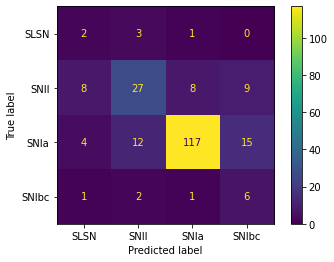

In [12]:
disp.plot()